<a href="https://colab.research.google.com/github/Tverdokhliebov-Vladyslav/123/blob/main/lab10_%D0%A2%D0%B2%D0%B5%D1%80%D0%B4%D0%BE%D1%85%D0%BB%D1%94%D0%B1%D0%BE%D0%B2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Input, Conv2D, MaxPooling2D, Dropout, Flatten, Dense, BatchNormalization
from tensorflow.keras.callbacks import EarlyStopping, ReduceLROnPlateau
from tensorflow.keras.datasets import fashion_mnist
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
import numpy as np

In [2]:
(x_train, y_train), (x_test, y_test) = fashion_mnist.load_data()

29515/29515 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
26421880/26421880 ━━━━━━━━━━━━━━━━━━━━ 2s 0us/step
5148/5148 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step
4422102/4422102 ━━━━━━━━━━━━━━━━━━━━ 1s 0us/step


In [3]:
x_train = np.expand_dims(x_train, axis=-1)
x_test = np.expand_dims(x_test, axis=-1)

In [4]:
# Масштабування пікселів до діапазону [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Перетворення міток на категоріальні дані
y_train_cat = to_categorical(y_train, 10)
y_test_cat = to_categorical(y_test, 10)

In [5]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

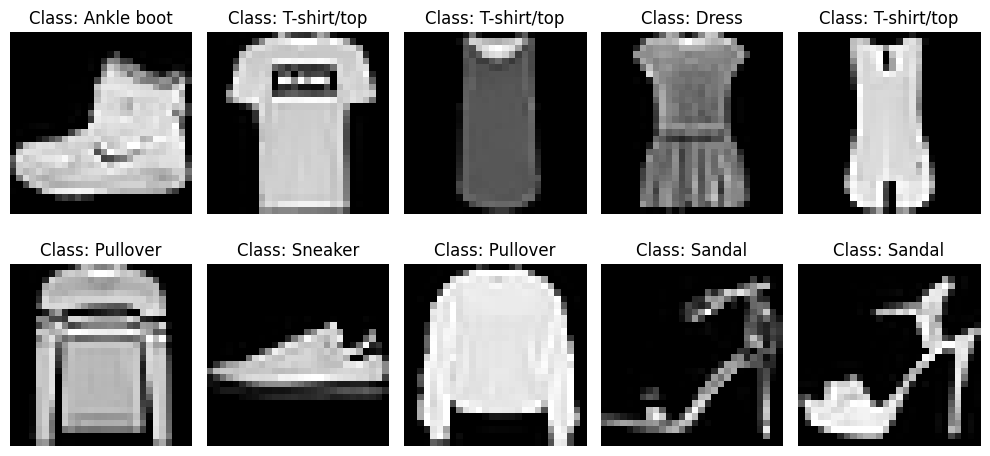

In [6]:
plt.figure(figsize=(10, 5))
for i in range(10):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_train[i].reshape(28, 28), cmap='gray')
    plt.title(f'Class: {class_names[y_train[i]]}')
    plt.axis('off')
plt.tight_layout()
plt.show()

In [7]:
# Створення моделі
model = Sequential([
    Input(shape=(28, 28, 1)),

    Conv2D(32, kernel_size=(3,3), activation='relu'),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(64, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Conv2D(128, (3, 3), padding="same", activation="relu"),
    BatchNormalization(),
    MaxPooling2D(pool_size=(2, 2)),
    Dropout(0.25),

    Flatten(),
    Dense(512, activation='relu'),
    BatchNormalization(),
    Dropout(0.2),
    Dense(10, activation='softmax')
    ])

# Компіляція моделі
model.compile(
    optimizer='adam',
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [8]:
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)
reduce_lr = ReduceLROnPlateau(monitor='val_loss', factor=0.2, patience=3, min_lr=1e-6)

# Навчання моделі
history = model.fit(
    x_train, y_train_cat,
    batch_size=128,
    epochs=100,
    validation_data=(x_test, y_test_cat),
    callbacks=[early_stopping, reduce_lr]
)

Epoch 1/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 20s 20ms/step - accuracy: 0.7540 - loss: 0.7090 - val_accuracy: 0.6739 - val_loss: 0.9976 - learning_rate: 0.0010
Epoch 2/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8661 - loss: 0.3578 - val_accuracy: 0.8902 - val_loss: 0.3062 - learning_rate: 0.0010
Epoch 3/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8874 - loss: 0.3041 - val_accuracy: 0.8948 - val_loss: 0.3018 - learning_rate: 0.0010
Epoch 4/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.8989 - loss: 0.2747 - val_accuracy: 0.9029 - val_loss: 0.2599 - learning_rate: 0.0010
Epoch 5/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 7ms/step - accuracy: 0.9075 - loss: 0.2533 - val_accuracy: 0.8990 - val_loss: 0.2695 - learning_rate: 0.0010
Epoch 6/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.9121 - loss: 0.2402 - val_accuracy: 0.9147 - val_loss: 0.2412 - learning_rate: 0.0010
Epoch 7/100
469/469 ━━━━━━━━━━━━━━━━━━━━ 3s 6ms/step - accuracy: 0.9137 - loss: 

In [9]:
# Оцінка моделі
test_loss, test_acc = model.evaluate(x_test, y_test_cat)
print(f'Test accuracy: {test_acc}')
print(f'Test loss: {test_loss}')

# Збереження вагів моделі після тренування
model.save('fashion_mnist_model.keras')

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.9305 - loss: 0.2047
Test accuracy: 0.9341999888420105
Test loss: 0.19529178738594055


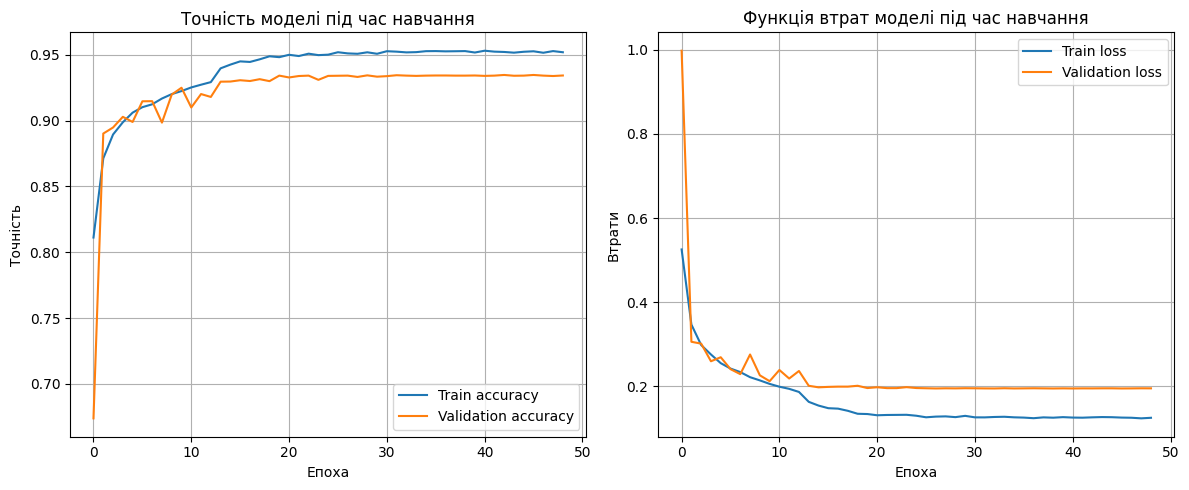

In [10]:
# Побудова графіку точності
plt.figure(figsize=(12, 5))

plt.subplot(1, 2, 1)
plt.plot(history.history['accuracy'], label='Train accuracy')
plt.plot(history.history['val_accuracy'], label='Validation accuracy')
plt.title('Точність моделі під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Точність')
plt.legend()
plt.grid(True)

# Побудова графіку функції втрат
plt.subplot(1, 2, 2)
plt.plot(history.history['loss'], label='Train loss')
plt.plot(history.history['val_loss'], label='Validation loss')
plt.title('Функція втрат моделі під час навчання')
plt.xlabel('Епоха')
plt.ylabel('Втрати')
plt.legend()
plt.grid(True)

plt.tight_layout()
plt.show()

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step


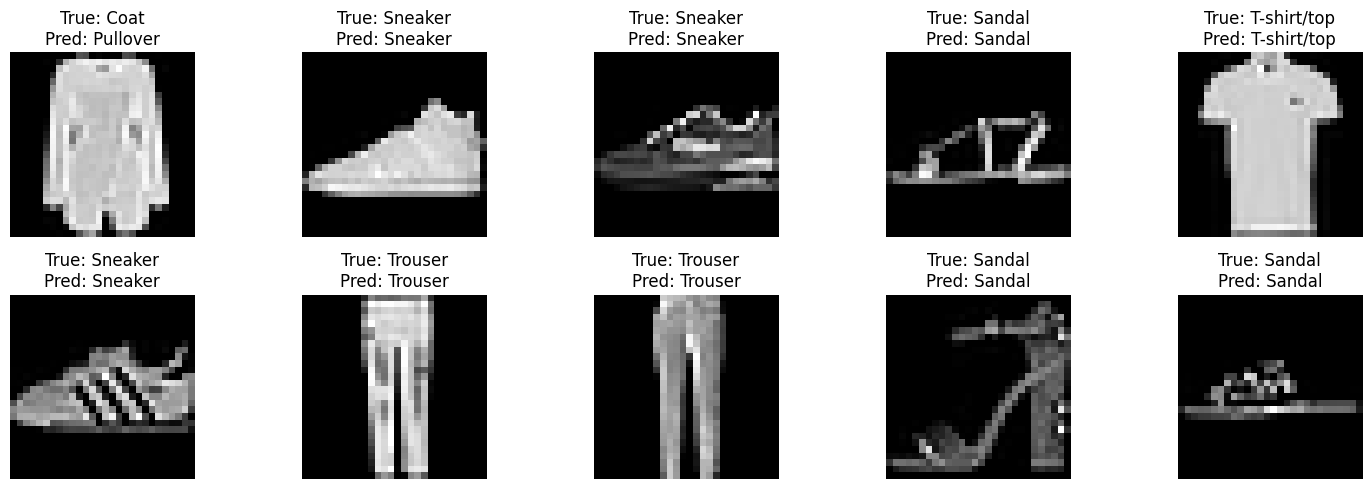

In [11]:
# Прогнозування
y_pred_probs = model.predict(x_test)
y_pred_classes = np.argmax(y_pred_probs, axis=1)
y_true_classes = np.argmax(y_test_cat, axis=1)

# Випадкові індекси
random_indices = np.random.choice(x_test.shape[0], 10, replace=False)

# Виведення зображень
plt.figure(figsize=(15, 5))
for i, idx in enumerate(random_indices):
    plt.subplot(2, 5, i + 1)
    plt.imshow(x_test[idx].reshape(28, 28), cmap='gray')
    plt.axis('off')
    true_label = class_names[y_true_classes[idx]]
    pred_label = class_names[y_pred_classes[idx]]
    plt.title(f'True: {true_label}\nPred: {pred_label}')
plt.tight_layout()
plt.show()

Висновок
У цій лабораторній роботі я реалізував згорткову нейронну мережу для задачі класифікації зображень. Архітектура моделі включає 3 згорткових шари та 2 повних шари. Для підвищення ефективності навчання були застосовані колбеки зокрема, ранння зупинка та зменшення швидкості навчання. Навчання тривало 49 епох, за які модель досягла точності 0.93 та втрат 0.2. Аналіз кривих навчання показав стабільне зростання точності та зменшення втрат, що свідчить про відсутність перенавчання. Було також продемонстровано 10 випадкових зображень із реальними та передбаченими класами — у більшості випадків (9 або навіть 10 із 10) класи збіглися.


жираф 🦒.